# size distribution example
Load basic packages

In [1]:
import size_distribution_class as sdc

import os, scipy, cv2
import pandas as pd
import numpy as np
from pylab import *
from scipy.optimize import curve_fit

#from bokeh.io import output_file, output_notebook
#from bokeh.models import Range1d, LinearAxis
#from bokeh.plotting import figure, show
#from bokeh.layouts import gridplot
#from bokeh.palettes import linear_palette, Turbo256
from matplotlib import pyplot as plt
#pd.set_option('plotting.backend', 'pandas_bokeh')
#output_notebook(hide_banner=True)
#from IPython.core.display import display, HTML



In [2]:
#psd = sdc.File_Process( verbose=True, analyze_color_name='black', min_cld_length=3, force_reprocessing=True ) #, analyze_color_BGR=[0,0,255]
#print(psd.folder)

## Loaded image

In [3]:
filepath = "Z:/externes/Erlangen Koehler/Porenanalyse BSE Bilder/5A/5A Tile Set (2) (stitched)_black_pores.tif"
specimen_name = "5A"
psd_5A = sdc.File_Process( filepath=filepath, verbose=True, analyze_color_name='black', min_cld_length=3, force_reprocessing=False ) #, analyze_color_BGR=[0,0,255]

--------------------------------------------------
  detected grayscale image
Analysing 5A Tile Set (2) (stitched)_black_pores.tif
size: 0.19 x 0.19 cm / 14167 x 11203 px 
loaded psd csv
Analysed particles: 0 (107.95 area-%), finished in 1080 ms
--------------------------------------------------
loading existing cld csv
finished processing 8643829 lines in 10681 ms
--------------------------------------------------
processing histograms
using 14169 bins


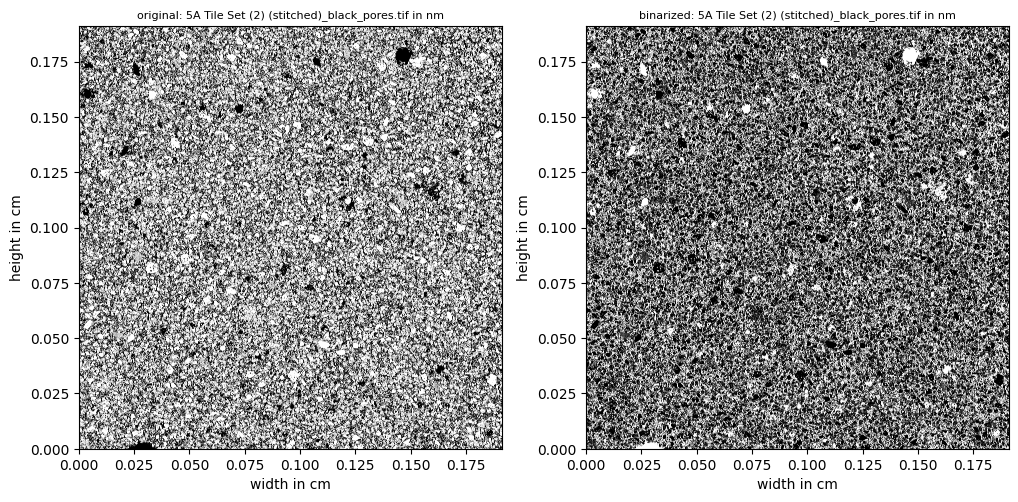

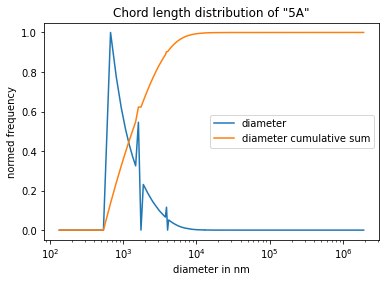

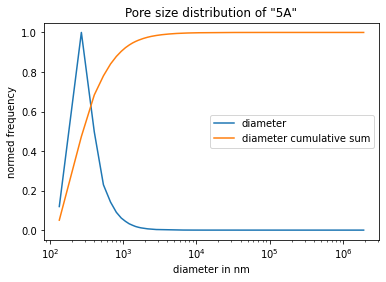

In [4]:
psd_5A.plot_images()
psd_5A.plot_histogram(dist_type='cld', column='diameter', title=specimen_name)
psd_5A.plot_histogram(dist_type='psd', column='diameter', title=specimen_name)

In [5]:
filepath = "Z:/externes/Erlangen Koehler/Porenanalyse BSE Bilder/23A/image_004-8bit-crop_black_pores_B.tif"
specimen_name = "23A"
psd_23A = sdc.File_Process( filepath=filepath, verbose=True, analyze_color_name='black', min_cld_length=3, force_reprocessing=False ) #, analyze_color_BGR=[0,0,255]

--------------------------------------------------
  detected color image
  Color R0 G0 B255 does not exist in the loaded image! Available colors:
[[0, 0, 0], [255, 255, 255]]
Analysing image_004-8bit-crop_black_pores_B.tif
size: 0.15 x 0.15 cm / 11693 x 15529 px 
loaded psd csv
Analysed particles: 0 (35.60 area-%), finished in 1247 ms
--------------------------------------------------
loading existing cld csv
finished processing 8883913 lines in 11948 ms
--------------------------------------------------
processing histograms
using 11695 bins


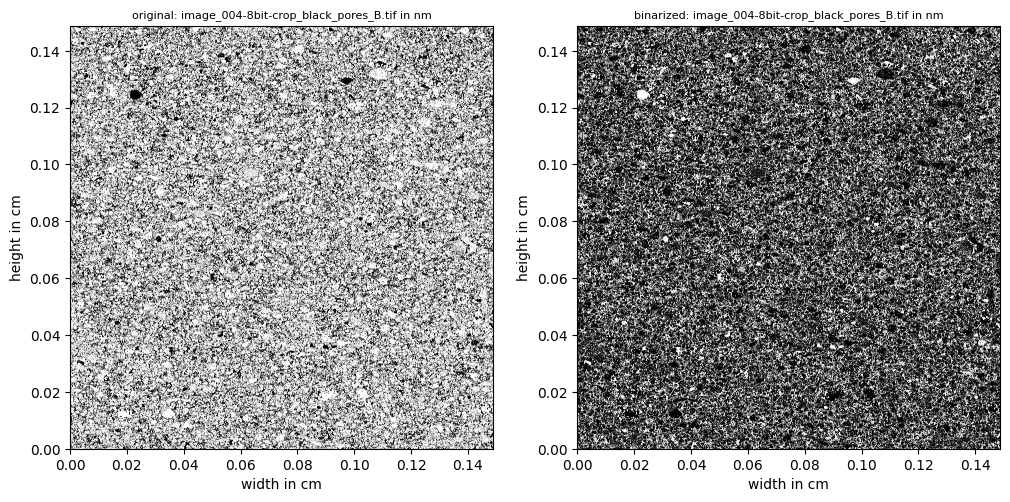

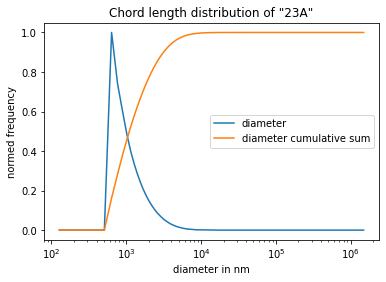

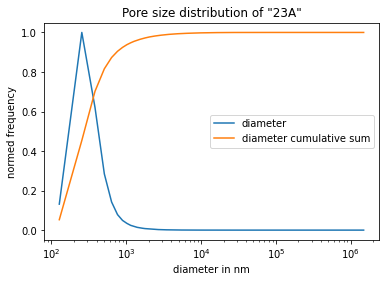

In [6]:
psd_23A.plot_images()
psd_23A.plot_histogram(dist_type='cld', column='diameter', title=specimen_name)
psd_23A.plot_histogram(dist_type='psd', column='diameter', title=specimen_name)

In [7]:
filepath = "Z:/externes/Erlangen Koehler/Porenanalyse BSE Bilder/40A/Layer-Tile Set (2) (stitched)_black_pores.tif"
specimen_name = "40A"
psd_40A = sdc.File_Process( filepath=filepath, verbose=True, analyze_color_name='black', min_cld_length=3, force_reprocessing=False ) #, analyze_color_BGR=[0,0,255]

--------------------------------------------------
  detected grayscale image
Analysing Layer-Tile Set (2) (stitched)_black_pores.tif
size: 0.15 x 0.15 cm / 11206 x 9729 px 
loaded psd csv
Analysed particles: 0 (76.23 area-%), finished in 859 ms
--------------------------------------------------
loading existing cld csv
finished processing 5240036 lines in 6407 ms
--------------------------------------------------
processing histograms
using 11208 bins


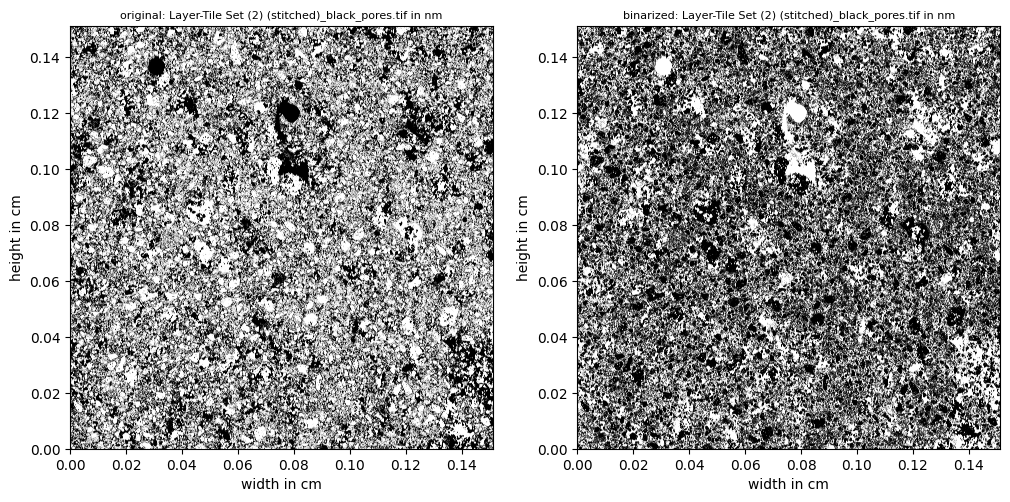

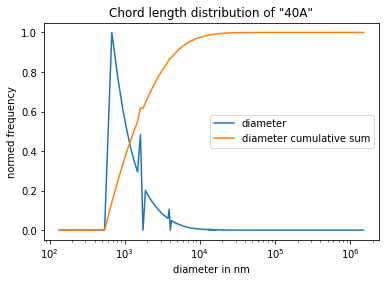

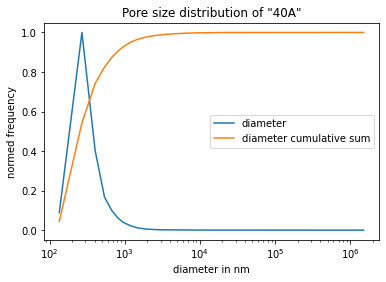

In [8]:
psd_40A.plot_images()
psd_40A.plot_histogram(dist_type='cld', column='diameter', title=specimen_name)
psd_40A.plot_histogram(dist_type='psd', column='diameter', title=specimen_name)

<AxesSubplot:title={'center':'Pore size distribution of "5A, 25A, 40A"'}, xlabel='area in nm', ylabel='normed frequency'>

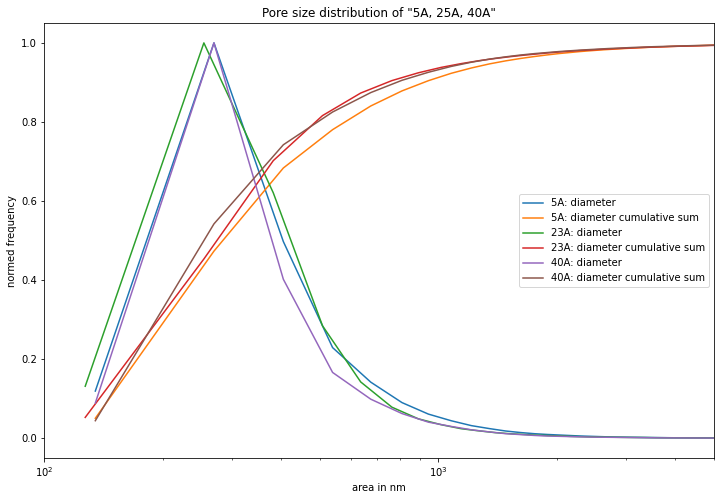

In [15]:
dist_type='psd'
column='area'
cleaned = False
title = "5A, 25A, 40A"
if cleaned:
	hist5,  bins5  = psd_5A.get_cleaned_histogram_list(dist_type, column, 'count')
	hist23, bins23 = psd_23A.get_cleaned_histogram_list(dist_type, column, 'count')
	hist40, bins40 = psd_40A.get_cleaned_histogram_list(dist_type, column, 'count')
else:
	hist5,  bins5  = psd_5A.get_histogram_list(dist_type, column, 'count')
	hist23, bins23 = psd_23A.get_histogram_list(dist_type, column, 'count')
	hist40, bins40 = psd_40A.get_histogram_list(dist_type, column, 'count')

dia_title = 'Chord length distribution of "{}"'.format(title) if dist_type == 'cld' else 'Pore size distribution of "{}"'.format(title)
cumsum_col_title = '{} cumulative sum'.format(column)
ylabel='normed frequency'

df5  = pd.read_csv( psd_5A.folder  + os.sep + psd_5A.base_filename  +'_'+ dist_type + '_'+ '5A'  + '_hist.csv', index_col=0 )
df23 = pd.read_csv( psd_23A.folder + os.sep + psd_23A.base_filename +'_'+ dist_type + '_'+ '23A' + '_hist.csv', index_col=0 )
df40 = pd.read_csv( psd_40A.folder + os.sep + psd_40A.base_filename +'_'+ dist_type + '_'+ '40A' + '_hist.csv', index_col=0 )


df5.rename( columns = {df5.columns[0]  : '5A: ' +df5.columns[0],  df5.columns[1]  : '5A: ' +df5.columns[1] }, inplace = True)
df23.rename(columns = {df23.columns[0] : '23A: '+df23.columns[0], df23.columns[1] : '23A: '+df23.columns[1]}, inplace = True)
df40.rename(columns = {df40.columns[0] : '40A: '+df40.columns[0], df40.columns[1] : '40A: '+df40.columns[1]}, inplace = True)

plt.rcParams["figure.figsize"] = [12,8]
ax = df5.plot( title=dia_title, logx=True, xlabel='{} in {}'.format(column, psd_5A.scaling['unit'] ), ylabel=ylabel, xlim=[ 100, 5000] )
df23.plot( 	   title=dia_title, logx=True, xlabel='{} in {}'.format(column, psd_23A.scaling['unit']), ylabel=ylabel, xlim=[ 100, 5000], ax = ax )
df40.plot(     title=dia_title, logx=True, xlabel='{} in {}'.format(column, psd_40A.scaling['unit']), ylabel=ylabel, xlim=[ 100, 5000], ax = ax )
#df.to_csv(self.folder + os.sep + self.base_filename +'_'+ title + '_hist.csv')

In [10]:
#psd.cld_df.hist(column="diameter",bins=50)
#psd.cld_df.hist(column="area",bins=50)

In [11]:
#psd.histogram_CLD.plot( logx=True )
#pd.DataFrame(psd.histogram_PSD).plot( logx=True )

In [12]:
#print( cld_df_sum_hist.index )

In [13]:
cld_df_sum_hist, psd_df_sum_hist = psd.get_sum_histogram(nth_bin=8)
val_max = cld_df_sum_hist.index.max()
val_min = cld_df_sum_hist.index.to_list()[1]/2
start_exp = 0#0.9
end_exp   = floor( log10( val_max ) ) + 1
x_tick_range = np.logspace( -1, end_exp, num=int(end_exp - -1), endpoint=False )
cld_df_sum_hist.plot( xlim=[ val_min, val_max], logx=True, xlabel='diameter in '+psd.scaling['unit'], ylabel='frequency' ) # xlim=[ 10**start_exp, r]
cld_df_sum_hist.plot( xlim=[ val_min, val_max], logx=True, xlabel='diameter in '+psd.scaling['unit'], ylabel='frequency' ) # xlim=[ 10**start_exp, r]

AttributeError: 'function' object has no attribute 'get_sum_histogram'

In [ ]:
psd_df_sum_hist.to_csv(psd.folder + os.sep + psd.base_filename + '_psd_sum_hist.csv')
psd_df_sum_hist[['diameter', 'diameter_sum']].plot( xlim=[0, r], xticks=x_tick_range, logx=True )

NameError: name 'r' is not defined

## Basic functions to generate the following diagrams

In [ ]:
def get_X_List( values ):
    value_cnt = len(values)
    x_range = list(range(value_cnt))
    x_range.pop(0)
    x_range.append(value_cnt)
    return x_range

def get_x(x, c):
    c_len = len(c)
    if c_len == 1:
        return c[0]
    else:
        return get_x(x, c[:-1])*x + c[c_len-1]

def get_polyfit_xy( x, y, deg=3, resolution=1 ):
    c = np.polynomial.polynomial.polyfit(x, y, deg)

    x_result = np.linspace(x[0], x[-1], num=len(x)*10)
    y_result = np.polynomial.polynomial.polyval(x_result, c)
    return x_result,y_result

def extrapolation_function(x, a, b, c):
    return a * np.exp(-b * x) + c

# see https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution
def inv_gaussian_dist(x, lamb, mu, c=1.0):
    # since this causes problems with the curve_fit function and x is always larger than 0 in this case, the following two lines are not needed
    #if x <= 0.0:
    #    return 0.0              
    return c * np.sqrt( lamb / ( 2.0 * np.pi * x**3 )) * np.exp( ( -lamb * (x - mu)**2 ) / ( 2 * mu**2 * x ) )

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fatiguelife.html#scipy.stats.fatiguelife
def fatiguelife(x, c):
    return scipy.stats.fatiguelife.pdf(x, c)#, loc, scale

def pareto(x,c):
    return scipy.stats.pareto.pdf(x, c)#, loc, scale

def powerlognorm(x, c, s):
    return scipy.stats.powerlognorm.pdf(x, c, s)

def get_histogram(dist_type='cld', x_column='diameter',y_column='count', max_value=None, plot_width=1200, legend_location='top_right', smoothing=0, do_fit=False, show_sum_list=False):
    # some basic label settings
    if dist_type == 'psd':
        df = psd.psd_df
        dist_name = 'pore size distribution'
        x_min_f=1
    else:
        df = psd.cld_df
        dist_name = 'chord length distribution'
    
    unit, power = psd.get_column_unit( x_column )


    # get & process the actual histogram
    hist, bins = psd.get_cleaned_histogram_list(dist_type, x_column, y_column)
    #hist, bins = get_histogram_list(dist_type, x_column, y_column)
    x_min = bins[0]
    if max_value == None: max_value = bins[-1]
    x_max = bins[-1] if max_value >= bins[-1] else max_value
    
    title = '{} as {} of {} up to {} {}'.format(dist_name, x_column, psd.filename, max_value, unit)
    x_label = 'pore size ({}) in {}'.format(x_column, unit)
    y_label = 'amount of items in %'


    #todo: Auftragen von histogrammen x-Achse: diameter und y-Achse: [dia,area,vol,surf] -> histogram(anzahl) in histogramm(gesamtlänge/-fläche/-volumen)
    #todo: prüfen, ob die Anfänge/Enden der gecleanten bins stimmen

    if x_column=='area':
        x_axis_type='log'
    elif x_column=='volume':
        x_axis_type='log'
    elif x_column=='surface':
        x_axis_type='log'
    else:
        x_axis_type='linear'

    # get the center of the bins
    bin_center = sdc.get_bin_center(bins)

    # normalize the histograms
    normalized_hist = hist/(np.sum(hist*bin_center)/100)
    y_max=np.amax(normalized_hist)
    
    first_val_pos = 0
    
    # create the figure
    p = figure(title=title,  plot_width=plot_width, x_range=(x_min, x_max), y_range=(0,y_max), plot_height=600, background_fill_color="#fafafa", x_axis_type=x_axis_type)
    p.legend.location = legend_location
    p.xaxis.axis_label = x_label

    # histogram of raw data
    #p.quad(bottom=0, top=hist2, left=bin_size_area[1:], right=bin_size_area[:-1], fill_color="navy", line_color="navy")
    p.quad(bottom=0, top=normalized_hist, left=bins[1:], right=bins[:-1], fill_color="red", line_color="red")

    # smoothed raw data
    if smoothing > 2:
        hist_smooth = sdc.smooth_histogram(normalized_hist, window_len=smoothing)
        p.line(bin_center, hist_smooth, line_color="#ff88ff", line_width=4, alpha=0.7, legend_label="smoothed")

    #polynome fit
    #fit_deg=2
    #label="polynome fit of the degree {}".format(fit_deg)
    #x_fit, y_fit = get_polyfit_xy( bins[1:], hist, deg=fit_deg, resolution=100)
    #p.line(x_fit, y_fit, line_color="#111111", line_width=2, alpha=0.7, legend_label="fit")
    if do_fit:
        # fit to a predefined function
        # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html  lamb, mu, c
        
        first_val_y = bin_center[first_val_pos]

        #popt, pcov = curve_fit(inv_gaussian_dist, bin_center[first_val_pos:], normalized_hist[first_val_pos:])#normalized_hist)#, bounds=(0, [np.inf, np.inf, np.inf]))
        popt, pcov = curve_fit(powerlognorm, bin_center[first_val_pos:], normalized_hist[first_val_pos:], bounds=([0, -np.inf], np.inf))#, normalized_hist)#, bounds=(0, [np.inf, np.inf, np.inf]))
        #popt, pcov = curve_fit(fatiguelife, bin_center[first_val_pos:], normalized_hist[first_val_pos:], bounds=(0, np.inf))
        
        #print(first_val_pos, ':', first_val_y)
        #for i in range(9):
        #    print(bin_center[i], normalized_hist[i])
        label='-'
        #label='fit: lamb=%5.3f, mu=%5.3f, c=%5.3f' % tuple(popt)
        #label='fit: c=%5.3f' % tuple(popt)
        #print(bin_center[first_val_pos:][0])
        x_fit = np.linspace(int(bin_center[first_val_pos:][0]), int(bin_center[-1])+1, num=len(bin_center)*2)
        #y_fit = inv_gaussian_dist(x_fit-first_val_y, *popt)
        y_fit = powerlognorm(x_fit-first_val_y, *popt)
        #y_fit = fatiguelife(x_fit-first_val_y, *popt)
        p.line(x_fit, y_fit, line_color="#11aa11", line_width=2, alpha=0.7, legend_label=label)

    if show_sum_list:
        # iterated sum
        sum_list = psd.get_sum_list(normalized_hist)
        p.extra_y_ranges = {"sum_line": Range1d(start=0, end=np.amax(sum_list))}

        p.line(bins, sum_list, line_color="#ff8888", line_width=4, alpha=0.7, legend_label="Sum", y_range_name="sum_line")
        p.add_layout(LinearAxis(y_range_name="sum_line",axis_label=y_label), 'left')

    
    show(p)

generate Diagrams 

In [ ]:
get_histogram('cld','diameter', max_value=1000, smoothing=7, do_fit=True, show_sum_list=False)

AttributeError: 'Figure' object has no property 'title'

In [ ]:
get_histogram('cld','diameter',y_column='area', max_value=1000, smoothing=7, do_fit=True, show_sum_list=False)

In [ ]:
get_histogram('cld','area', do_fit=True)

In [ ]:
get_histogram('cld','surface', do_fit=True)

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

In [ ]:
get_histogram('cld','volume', do_fit=True)

In [ ]:
get_histogram('psd','diameter',1000, do_fit=True)

KeyError: 1000

In [ ]:
get_histogram('psd','surface')

## statistics of the datasets

In [ ]:
print('PSD')
columns = [ 'diameter', 'area', 'surface', 'volume']
for column in columns:
    col_max, col_mean, col_median = psd.get_basic_values(column, psd.psd_df)
    unit, _ = psd.get_column_unit( column )
    print('{} - max: {:.2f} {}, mean: {:.2f} {}, median: {:.2f} {}'.format(column, col_max, unit, col_mean, unit, col_median, unit))

PSD
diameter - max: 1382.52 nm, mean: 2.85 nm, median: 1.60 nm
area - max: 1501179.50 nm², mean: 428.80 nm², median: 2.00 nm²
surface - max: 6004718.00 nm², mean: 1715.19 nm², median: 8.00 nm²
volume - max: 1383606959.68 nm³, mean: 311642.39 nm³, median: 2.13 nm³


In [ ]:
print('CLD')
columns = [ 'diameter', 'area', 'surface', 'volume']
for column in columns:
    col_max, col_mean, col_median = psd.get_basic_values(column, psd.cld_df)
    unit, _ = psd.get_column_unit( column )
    print('{} - max: {:.2f} {}, mean: {:.2f} {}, median: {:.2f} {}'.format(column, col_max, unit, col_mean, unit, col_median, unit))

CLD
diameter - max: 1289.00 nm, mean: 99.93 nm, median: 8.00 nm
area - max: 1121391795.63 nm², mean: 16440705.64 nm², median: 268.08 nm²
surface - max: 5219822.17 nm², mean: 142930.85 nm², median: 201.06 nm²
volume - max: 1121391795.63 nm³, mean: 16440705.64 nm³, median: 268.08 nm³


# experimental stuff

In [ ]:
hist, bins = psd.get_histogram_list( psd.cld_df['diameter'], 1000, power=1 )

def fit_function_a(x, a, b, c):

    return a * np.exp(-b * x) + c


popt, pcov = curve_fit(fit_function_a, bins[:-1], hist) #, bounds=(0, [3., 1., 0.5]))
print(popt)

label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt)
fit_function_a(bins[:-1], *popt)
plt.plot(bins[:-1], fit_function_a(bins[:-1], *popt), 'g--', label=label)
plt.xlabel('x')

plt.ylabel('y')

plt.legend()

plt.show()

TypeError: get_histogram_list() got an unexpected keyword argument 'power'